In [9]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
import scipy.stats as stats
import numpy as np
# Drop non-numeric columns which cannot be used in correlation calculation
numeric_data = data_fillmean.select_dtypes(include=[np.number])

file_path = 'dataset/cleaned_data.csv'

# Load the dataset
data_fillmean = pd.read_csv(file_path)

# Filter numerical columns
numerical_columns = data_fillmean.select_dtypes(include=['number']).columns
# Perform PCA
# Standardizing the features
scaler = StandardScaler()
numeric_scaled = scaler.fit_transform(numeric_data)

# Applying PCA
pca = PCA(n_components=2)  # You can adjust the number of components
principal_components = pca.fit_transform(numeric_scaled)

# Creating a DataFrame with principal components
pca_df = pd.DataFrame(data=principal_components, columns=['Principal Component 1', 'Principal Component 2'])

# Display the first few rows of the PCA DataFrame
print(pca_df.head())

   Principal Component 1  Principal Component 2
0              -1.400184              -0.910640
1              -0.639256               0.217202
2              -0.690845               2.047328
3              -0.034815               1.969792
4              -3.162767              -0.960192


Explained Variance Ratio: [0.41121844 0.18695343]


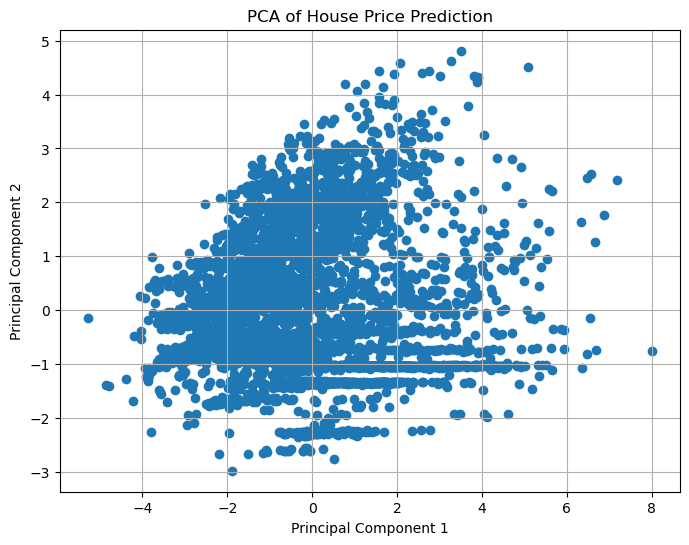

                     PC1       PC2
price           0.328893  0.076976
bedrooms        0.353610  0.264287
bathrooms       0.443541  0.004757
sqft_living     0.487239  0.151833
floors          0.284750 -0.482098
condition      -0.099339  0.441277
sqft_above      0.457104 -0.205399
sqft_basement   0.102559  0.650977
price_per_sqft -0.149151 -0.089701


In [11]:
print("Explained Variance Ratio:", pca.explained_variance_ratio_)

plt.figure(figsize=(8, 6))
plt.scatter(pca_df['Principal Component 1'], pca_df['Principal Component 2'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of House Price Prediction')
plt.grid(True)
plt.show()

loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2'], index=numeric_data.columns)
print(loadings)

In [12]:
import pandas as pd
import statsmodels.api as sm

# Assuming 'data_fillmean' is already loaded and is your DataFrame
# Selecting the independent variables and the target variable
X = data_fillmean[['sqft_living', 'bathrooms', 'bedrooms', 'sqft_above', 'floors']]
y = data_fillmean['price']

# Adding a constant to the model (the intercept)
X = sm.add_constant(X)

# Fitting the ordinary least squares (OLS) model
model = sm.OLS(y, X).fit()

# Viewing the regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.394
Model:                            OLS   Adj. R-squared:                  0.394
Method:                 Least Squares   F-statistic:                     553.2
Date:                Sun, 05 May 2024   Prob (F-statistic):               0.00
Time:                        01:56:24   Log-Likelihood:                -57010.
No. Observations:                4255   AIC:                         1.140e+05
Df Residuals:                    4249   BIC:                         1.141e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         1.66e+05   1.12e+04     14.790      

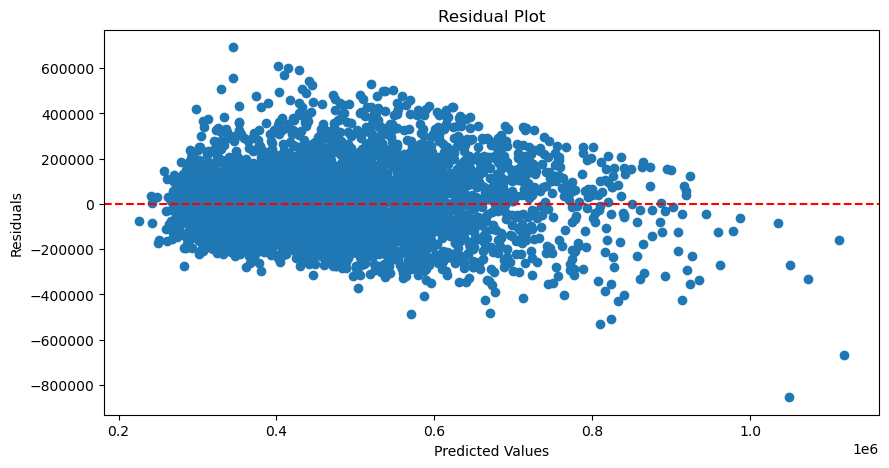

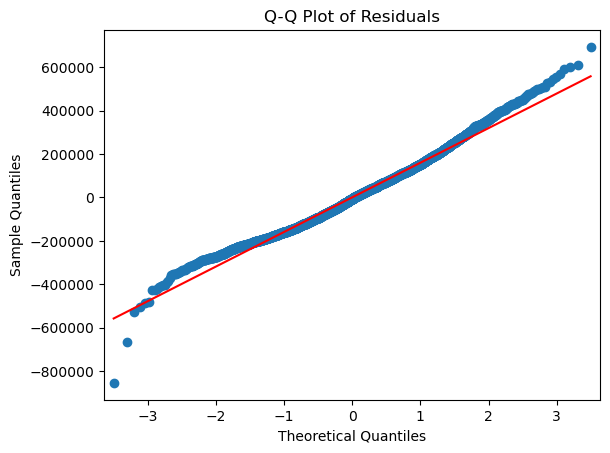

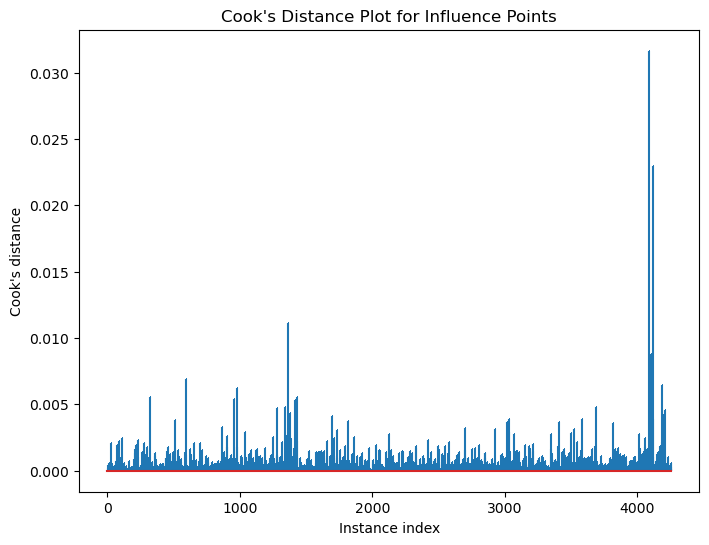

In [13]:
# Plotting residuals
plt.figure(figsize=(10, 5))
plt.scatter(model.predict(), model.resid)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

# Q-Q plot for normality
fig = sm.qqplot(model.resid, line='s')
plt.title("Q-Q Plot of Residuals")
plt.show()

# Checking for the influence of points
from statsmodels.stats.outliers_influence import OLSInfluence
test = OLSInfluence(model).summary_frame()

fig, ax = plt.subplots(figsize=(8,6))
ax.stem(test.index, test.cooks_d, markerfmt=",")
ax.set_xlabel("Instance index")
ax.set_ylabel("Cook's distance")
plt.title("Cook's Distance Plot for Influence Points")
plt.show()